                                               Quote           Author  \
0  The world as we have created it is a process ...  Albert Einstein   
1  It is our choices, Harry, that show what we t...     J.K. Rowling   
2  There are only two ways to live your life. On...  Albert Einstein   
3  The person, be it gentleman or lady, who has ...      Jane Austen   
4  Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  
                                                Quote                  Author  \
45  The real lover is the man who can thrill you ...          Marilyn Monroe   
46  A wise girl kisses but doesn't love, listens ...          Marilyn Monroe   
47      Only in t

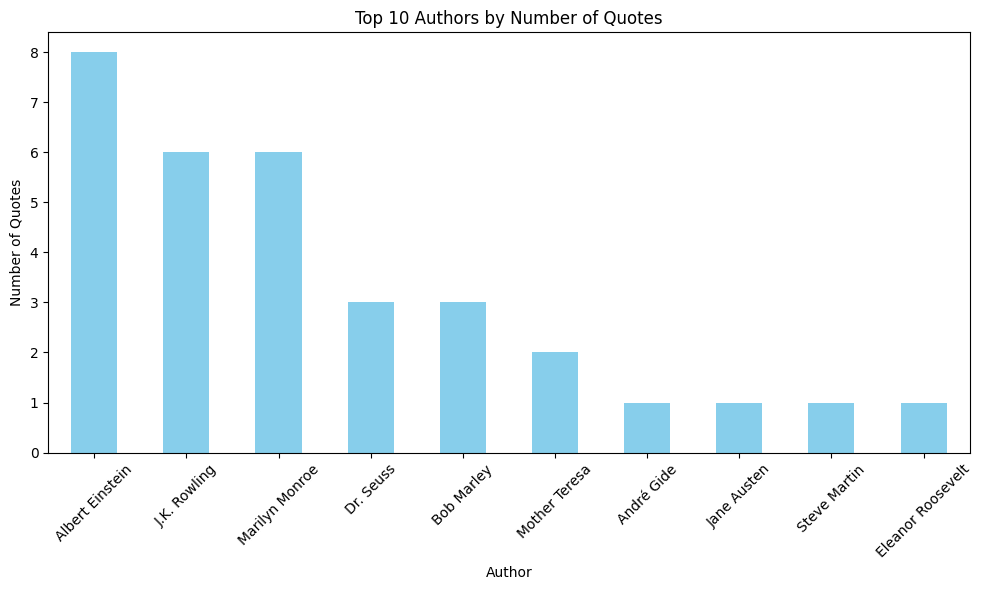

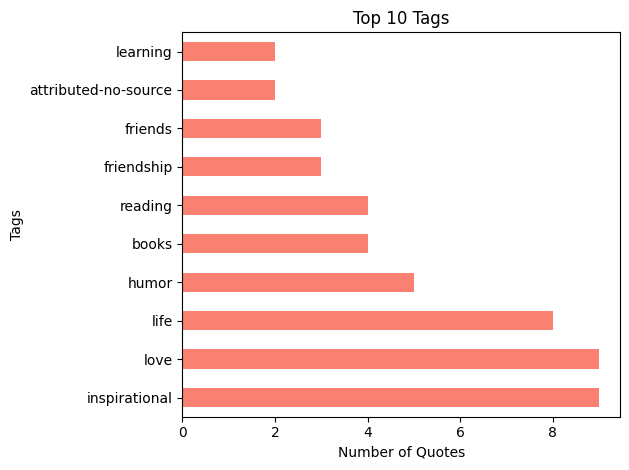

<ipython-input-7-d9e63bc7e8a6>:63: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


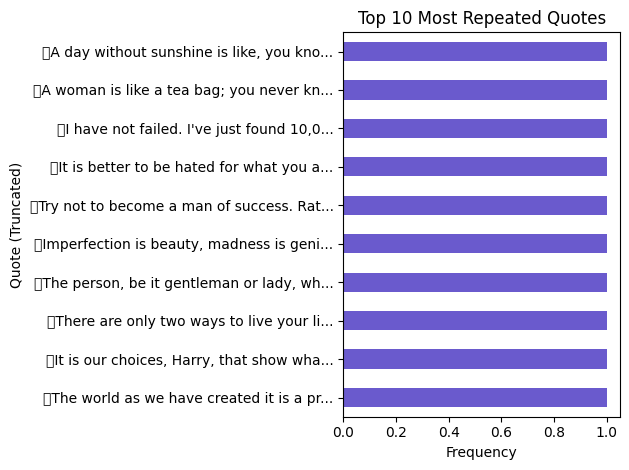

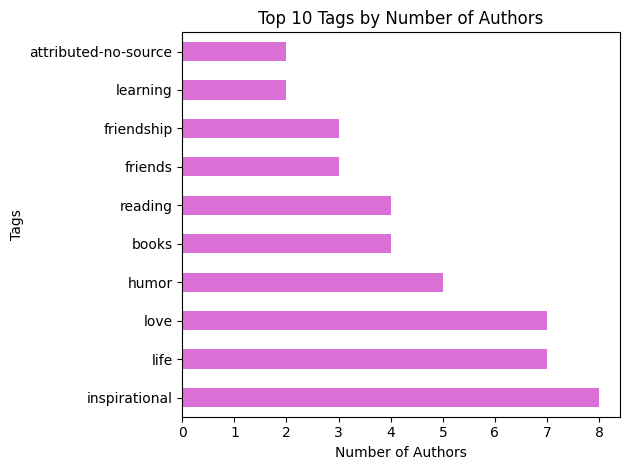

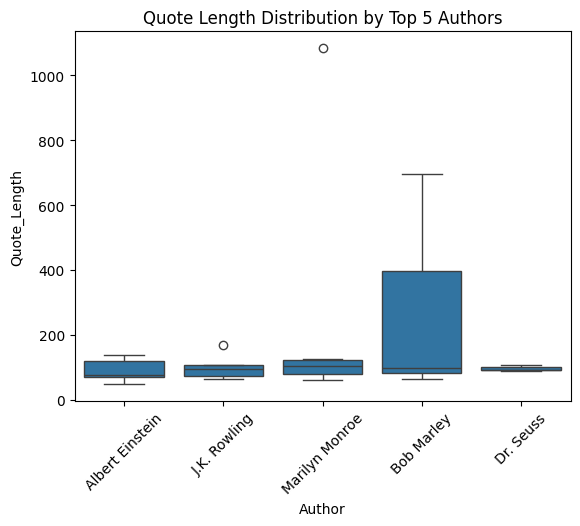

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the CSV with proper encoding to avoid UnicodeDecodeError
df = pd.read_csv('quotes_all_pages.csv', encoding='ISO-8859-1')

# Get basic overview
print(df.head())         # Show top 5 rows
print(df.tail())         # Show last 5 rows
print(df.shape)          # Rows and columns
print(df.columns)        # Column names
print(df.info())         # Data types and non-null counts
print(df.describe())     # Summary stats for numeric data (if any)

# Clean the data
print(df.isnull().sum())       # Check for missing values
print("Duplicates:", df.duplicated().sum())  # Check for duplicates

# Remove duplicates if any
df = df.drop_duplicates()

# Explore individual column
# Check unique authors
print(df['Author'].value_counts())

# Count of quotes per tag
df['Tags'] = df['Tags'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
from collections import Counter
tag_list = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = pd.Series(Counter(tag_list)).sort_values(ascending=False)

# Visualize the data
# Top 10 Authors with most quotes
df['Author'].value_counts().head(10).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 10 Authors by Number of Quotes')
plt.xlabel('Author')
plt.ylabel('Number of Quotes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Tags
tag_counts.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Tags')
plt.xlabel('Number of Quotes')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()

#Top 10 mostly frequently occuring code
# Most frequent quotes
quote_counts = df['Quote'].value_counts().head(10)

# Plot
quote_counts.plot(kind='barh', color='slateblue')
plt.title('Top 10 Most Repeated Quotes')
plt.xlabel('Frequency')
plt.ylabel('Quote (Truncated)')
plt.yticks(ticks=range(10), labels=[q[:40] + "..." for q in quote_counts.index])  # truncate for display
plt.tight_layout()
plt.show()

#This shows the most universally discussed themes
# Count how many authors used each tag
tag_authors = df.explode('Tags').groupby('Tags')['Author'].nunique().sort_values(ascending=False).head(10)

# Plot
tag_authors.plot(kind='barh', color='orchid')
plt.title('Top 10 Tags by Number of Authors')
plt.xlabel('Number of Authors')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()

# Add new column: Quote Length
df['Quote_Length'] = df['Quote'].apply(len)

# Boxplot for top 5 authors
top5_authors = df['Author'].value_counts().head(5).index
sns.boxplot(data=df[df['Author'].isin(top5_authors)], x='Author', y='Quote_Length')
plt.title('Quote Length Distribution by Top 5 Authors')
plt.xticks(rotation=45)
plt.show()

